In [74]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
df = pd.read_csv('data/query.csv')
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-12-31T16:36:23.043Z,27.7270,85.7990,22.322,4.6,mb,60.0,99,0.466,0.55,...,2024-03-02T21:39:35.040Z,"27 km E of Nagarkot, Nepal",earthquake,9.97,2.373,0.064,73,reviewed,us,us
1,2023-12-25T23:03:56.507Z,34.7111,76.7782,34.705,4.6,mb,100.0,79,3.096,0.40,...,2024-03-02T21:39:40.040Z,"24 km S of Thang, India",earthquake,5.88,5.172,0.059,85,reviewed,us,us
2,2023-12-19T12:14:23.981Z,18.1110,95.9762,10.000,4.5,mb,49.0,154,2.840,0.83,...,2024-02-27T22:57:01.040Z,"43 km NNE of Letpandan, Myanmar",earthquake,7.47,1.904,0.100,29,reviewed,us,us
3,2023-12-18T22:20:45.046Z,5.9749,94.8546,9.334,4.5,mb,63.0,80,2.211,0.44,...,2024-02-27T22:57:01.040Z,"51 km W of Sabang, Indonesia",earthquake,9.33,4.016,0.083,42,reviewed,us,us
4,2023-12-18T10:31:29.554Z,33.1609,76.6962,10.000,4.8,mww,92.0,51,6.514,0.73,...,2024-02-27T22:57:00.040Z,"38 km SSW of Padam, India",earthquake,7.42,1.799,0.098,10,reviewed,us,us
5,2023-12-18T10:18:52.984Z,33.1836,76.8401,10.000,5.1,mww,119.0,32,3.023,0.97,...,2024-02-27T22:57:00.040Z,"31 km S of Padam, India",earthquake,2.84,1.760,0.080,15,reviewed,us,us
6,2023-12-17T04:17:06.162Z,36.2885,76.3623,10.000,4.6,mb,32.0,86,3.658,1.36,...,2024-02-27T22:56:59.040Z,"128 km NNE of Skardu, Pakistan",earthquake,9.02,1.940,0.146,14,reviewed,us,us
7,2023-12-12T02:05:45.531Z,36.3970,70.6032,152.821,4.9,mb,91.0,20,2.248,0.62,...,2024-02-17T22:43:06.040Z,"55 km SSW of Jurm, Afghanistan",earthquake,6.87,1.505,0.044,162,reviewed,us,us
8,2023-12-10T03:38:19.102Z,36.3106,69.9711,144.121,4.5,mb,62.0,56,1.922,1.21,...,2024-02-17T22:43:05.040Z,"30 km SSE of Farkhār, Afghanistan",earthquake,4.64,6.315,0.071,58,reviewed,us,us
9,2023-12-05T14:45:03.410Z,9.3573,93.9828,10.000,4.8,mb,75.0,47,5.047,0.77,...,2024-02-10T23:47:35.040Z,"289 km SSE of Port Blair, India",earthquake,8.36,1.805,0.077,52,reviewed,us,us


In [4]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1066 non-null   object 
 1   latitude         1066 non-null   float64
 2   longitude        1066 non-null   float64
 3   depth            1066 non-null   float64
 4   mag              1066 non-null   float64
 5   magType          1066 non-null   object 
 6   nst              349 non-null    float64
 7   gap              1066 non-null   int64  
 8   dmin             1066 non-null   float64
 9   rms              1066 non-null   float64
 10  net              1066 non-null   object 
 11  id               1066 non-null   object 
 12  updated          1066 non-null   object 
 13  place            1066 non-null   object 
 14  type             1066 non-null   object 
 15  horizontalError  1066 non-null   float64
 16  depthError       1066 non-null   float64
 17  magError      

# Without TimeSeries

In [10]:
df.magType.unique()
df.type.unique()

array(['earthquake'], dtype=object)

In [55]:
df2 = df.drop(columns=['type', 'time', 'nst', 'magNst', 'updated', 'place', 'locationSource', 'magSource', 'id'])

In [56]:
df2

,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,horizontalError,depthError,magError,status
0,27.7270,85.7990,22.322,4.6,mb,99,0.466,0.55,us,9.97,2.373,0.064,reviewed
1,34.7111,76.7782,34.705,4.6,mb,79,3.096,0.40,us,5.88,5.172,0.059,reviewed
2,18.1110,95.9762,10.000,4.5,mb,154,2.840,0.83,us,7.47,1.904,0.100,reviewed
3,5.9749,94.8546,9.334,4.5,mb,80,2.211,0.44,us,9.33,4.016,0.083,reviewed
4,33.1609,76.6962,10.000,4.8,mww,51,6.514,0.73,us,7.42,1.799,0.098,reviewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,3.9401,95.8773,45.600,5.1,mb,92,1.666,0.84,us,7.00,4.300,0.056,reviewed
1062,36.0731,71.7714,113.400,4.5,mb,68,1.456,0.98,us,5.80,7.400,0.121,reviewed
1063,11.7558,93.3604,111.100,4.5,mb,94,6.195,1.04,us,10.20,8.600,0.093,reviewed
1064,36.2364,70.3225,184.990,4.5,mb,77,1.678,0.83,us,8.10,12.100,0.191,reviewed


In [57]:
df2.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'dmin',
       'rms', 'net', 'horizontalError', 'depthError', 'magError', 'status'],
      dtype='object')

In [58]:
df2.drop(columns=['status'], inplace=True)

In [59]:
df2

,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,horizontalError,depthError,magError
0,27.7270,85.7990,22.322,4.6,mb,99,0.466,0.55,us,9.97,2.373,0.064
1,34.7111,76.7782,34.705,4.6,mb,79,3.096,0.40,us,5.88,5.172,0.059
2,18.1110,95.9762,10.000,4.5,mb,154,2.840,0.83,us,7.47,1.904,0.100
3,5.9749,94.8546,9.334,4.5,mb,80,2.211,0.44,us,9.33,4.016,0.083
4,33.1609,76.6962,10.000,4.8,mww,51,6.514,0.73,us,7.42,1.799,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,3.9401,95.8773,45.600,5.1,mb,92,1.666,0.84,us,7.00,4.300,0.056
1062,36.0731,71.7714,113.400,4.5,mb,68,1.456,0.98,us,5.80,7.400,0.121
1063,11.7558,93.3604,111.100,4.5,mb,94,6.195,1.04,us,10.20,8.600,0.093
1064,36.2364,70.3225,184.990,4.5,mb,77,1.678,0.83,us,8.10,12.100,0.191


In [60]:
df2.drop(columns=['net'], inplace=True)

In [61]:
df2

,latitude,longitude,depth,mag,magType,gap,dmin,rms,horizontalError,depthError,magError
0,27.7270,85.7990,22.322,4.6,mb,99,0.466,0.55,9.97,2.373,0.064
1,34.7111,76.7782,34.705,4.6,mb,79,3.096,0.40,5.88,5.172,0.059
2,18.1110,95.9762,10.000,4.5,mb,154,2.840,0.83,7.47,1.904,0.100
3,5.9749,94.8546,9.334,4.5,mb,80,2.211,0.44,9.33,4.016,0.083
4,33.1609,76.6962,10.000,4.8,mww,51,6.514,0.73,7.42,1.799,0.098
...,...,...,...,...,...,...,...,...,...,...,...
1061,3.9401,95.8773,45.600,5.1,mb,92,1.666,0.84,7.00,4.300,0.056
1062,36.0731,71.7714,113.400,4.5,mb,68,1.456,0.98,5.80,7.400,0.121
1063,11.7558,93.3604,111.100,4.5,mb,94,6.195,1.04,10.20,8.600,0.093
1064,36.2364,70.3225,184.990,4.5,mb,77,1.678,0.83,8.10,12.100,0.191


In [50]:
# cat_Dat = [ox for ox in df2.columns if ]
cat_dat = df2.select_dtypes(include='bool')
cat_dat.columns
# for idx, vals in df2.dtypes

Index(['magType_mb', 'magType_mwr', 'magType_mww'], dtype='object')

In [ ]:
# Encoding Categorical Data
df2 = pd.get_dummies(df2, columns=['magType'])

# Splitting the Dataset
X_train = df2.drop(columns=['mag'])
y_train = df2['mag']

In [54]:
OE = OrdinalEncoder()

df2_ord = OE.fit_transform(df2[cat_dat])
df2_ord

array([[nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ...,  0., nan, nan],
       ...,
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ..., nan, nan,  0.]])

In [62]:
cat_dat = df2.select_dtypes(include=['object']).columns.tolist()

In [69]:
OHE = OneHotEncoder(sparse_output=False)

df2_ord = OHE.fit_transform(df2[cat_dat])
df2_ord

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [70]:
df21 = pd.DataFrame(df2_ord, columns=OHE.get_feature_names_out(cat_dat))

In [73]:
df2 = pd.concat([df2, df21], axis=1)
df2

,latitude,longitude,depth,mag,magType,gap,dmin,rms,horizontalError,depthError,magError,magType_mb,magType_mwr,magType_mww
0,27.7270,85.7990,22.322,4.6,mb,99,0.466,0.55,9.97,2.373,0.064,1.0,0.0,0.0
1,34.7111,76.7782,34.705,4.6,mb,79,3.096,0.40,5.88,5.172,0.059,1.0,0.0,0.0
2,18.1110,95.9762,10.000,4.5,mb,154,2.840,0.83,7.47,1.904,0.100,1.0,0.0,0.0
3,5.9749,94.8546,9.334,4.5,mb,80,2.211,0.44,9.33,4.016,0.083,1.0,0.0,0.0
4,33.1609,76.6962,10.000,4.8,mww,51,6.514,0.73,7.42,1.799,0.098,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,3.9401,95.8773,45.600,5.1,mb,92,1.666,0.84,7.00,4.300,0.056,1.0,0.0,0.0
1062,36.0731,71.7714,113.400,4.5,mb,68,1.456,0.98,5.80,7.400,0.121,1.0,0.0,0.0
1063,11.7558,93.3604,111.100,4.5,mb,94,6.195,1.04,10.20,8.600,0.093,1.0,0.0,0.0
1064,36.2364,70.3225,184.990,4.5,mb,77,1.678,0.83,8.10,12.100,0.191,1.0,0.0,0.0


In [81]:
df2.drop(columns=['magType'], inplace=True)
df2

,latitude,longitude,depth,mag,gap,dmin,rms,horizontalError,depthError,magError,magType_mb,magType_mwr,magType_mww
0,27.7270,85.7990,22.322,4.6,99,0.466,0.55,9.97,2.373,0.064,1.0,0.0,0.0
1,34.7111,76.7782,34.705,4.6,79,3.096,0.40,5.88,5.172,0.059,1.0,0.0,0.0
2,18.1110,95.9762,10.000,4.5,154,2.840,0.83,7.47,1.904,0.100,1.0,0.0,0.0
3,5.9749,94.8546,9.334,4.5,80,2.211,0.44,9.33,4.016,0.083,1.0,0.0,0.0
4,33.1609,76.6962,10.000,4.8,51,6.514,0.73,7.42,1.799,0.098,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,3.9401,95.8773,45.600,5.1,92,1.666,0.84,7.00,4.300,0.056,1.0,0.0,0.0
1062,36.0731,71.7714,113.400,4.5,68,1.456,0.98,5.80,7.400,0.121,1.0,0.0,0.0
1063,11.7558,93.3604,111.100,4.5,94,6.195,1.04,10.20,8.600,0.093,1.0,0.0,0.0
1064,36.2364,70.3225,184.990,4.5,77,1.678,0.83,8.10,12.100,0.191,1.0,0.0,0.0


In [83]:
X_train = df2.drop(columns=['mag'])
y_train = df2['mag']

In [84]:
# Finding Correlation

df2_corr = df2.corr(method='pearson')
df2_corr

,latitude,longitude,depth,mag,gap,dmin,rms,horizontalError,depthError,magError,magType_mb,magType_mwr,magType_mww
latitude,1.000000,-0.705437,0.286020,-0.006999,-0.289159,-0.115562,0.022152,-0.205584,0.143155,-0.219773,-0.024242,0.045561,0.017836
longitude,-0.705437,1.000000,-0.377992,0.022999,0.156286,0.119549,-0.086100,0.113987,-0.182980,0.105484,0.057667,-0.051999,-0.050567
depth,0.286020,-0.377992,1.000000,0.011091,-0.190386,-0.352310,0.091699,-0.102358,0.609555,-0.093993,-0.081640,0.016940,0.079769
mag,-0.006999,0.022999,0.011091,1.000000,-0.511073,-0.003015,0.080277,-0.175274,-0.228568,-0.344308,-0.679007,-0.002221,0.684109
gap,-0.289159,0.156286,-0.190386,-0.511073,1.000000,0.080063,-0.027941,0.352720,0.054640,0.541672,0.435736,-0.025848,-0.435073
dmin,-0.115562,0.119549,-0.352310,-0.003015,0.080063,1.000000,-0.130263,0.351715,-0.320333,0.036555,0.038413,-0.051014,-0.031320
rms,0.022152,-0.086100,0.091699,0.080277,-0.027941,-0.130263,1.000000,-0.084110,0.035060,-0.030375,-0.063529,0.015872,0.061686
horizontalError,-0.205584,0.113987,-0.102358,-0.175274,0.352720,0.351715,-0.084110,1.000000,0.000236,0.260446,0.162009,-0.049873,-0.155951
depthError,0.143155,-0.182980,0.609555,-0.228568,0.054640,-0.320333,0.035060,0.000236,1.000000,0.087668,0.121616,0.019103,-0.125230
magError,-0.219773,0.105484,-0.093993,-0.344308,0.541672,0.036555,-0.030375,0.260446,0.087668,1.000000,0.080795,0.004974,-0.082082


# Data Vis

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='magType', ylabel='mag'>

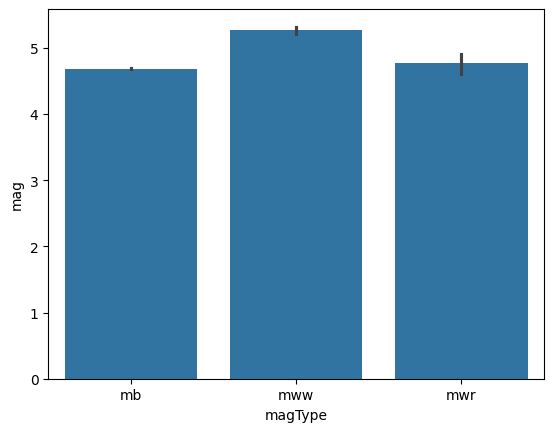

In [89]:
sns.barplot(df, x='magType', y='mag')

<Axes: xlabel='magType', ylabel='mag'>

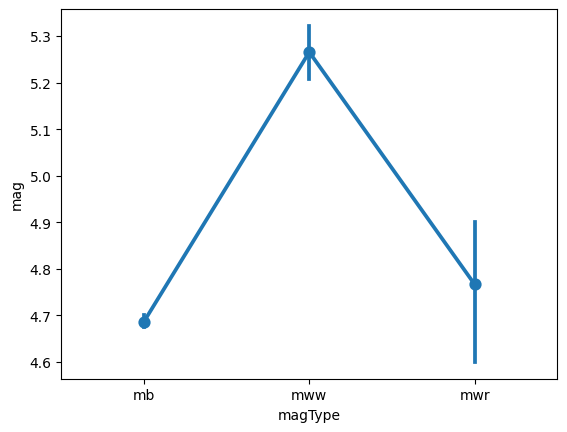

In [90]:
sns.pointplot(df, x='magType', y='mag')

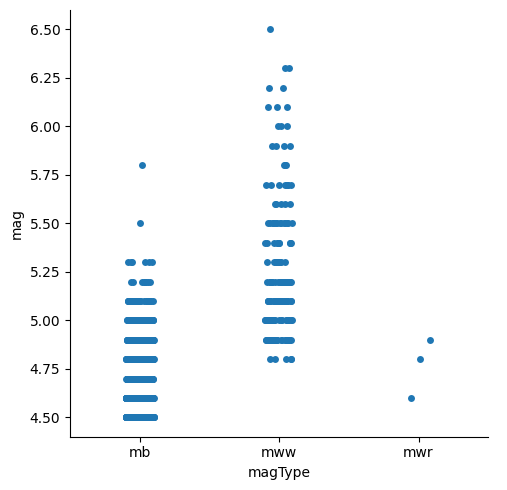

In [91]:
sns.catplot(df, x='magType', y='mag')

c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you m

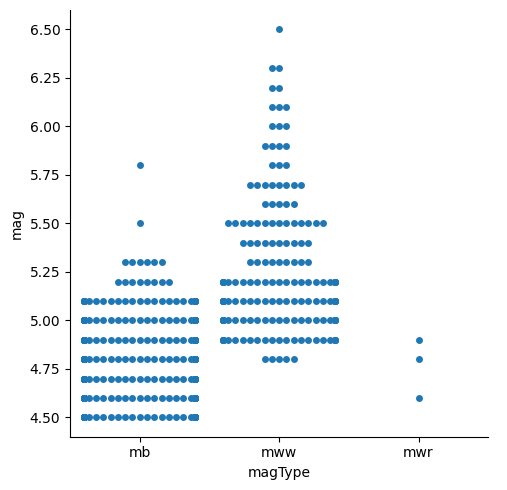

In [92]:
sns.catplot(df, x='magType', y='mag', kind='swarm')

<Axes: xlabel='depth', ylabel='mag'>

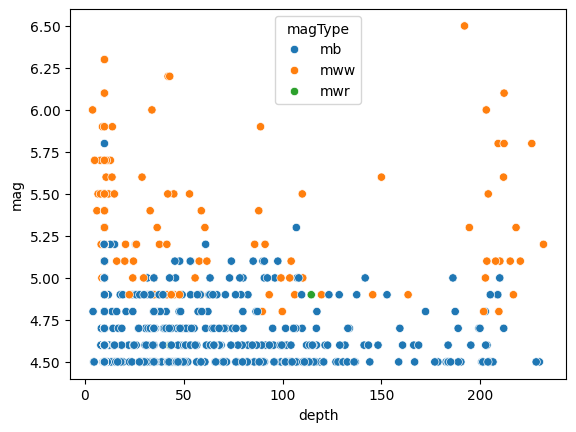

In [93]:
sns.scatterplot(df, x='depth', y='mag', hue='magType')

In [97]:
# Map Visualization
import folium

m = folium.Map()

for lat, lon in zip(df2['latitude'], df2['longitude']):
    folium.Marker([lat, lon]).add_to(m)

m.save('map_viz.html')

In [103]:
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             1066 non-null   datetime64[ns, UTC]
 1   latitude         1066 non-null   float64            
 2   longitude        1066 non-null   float64            
 3   depth            1066 non-null   float64            
 4   mag              1066 non-null   float64            
 5   magType          1066 non-null   object             
 6   nst              349 non-null    float64            
 7   gap              1066 non-null   int64              
 8   dmin             1066 non-null   float64            
 9   rms              1066 non-null   float64            
 10  net              1066 non-null   object             
 11  id               1066 non-null   object             
 12  updated          1066 non-null   object             
 13  place            1

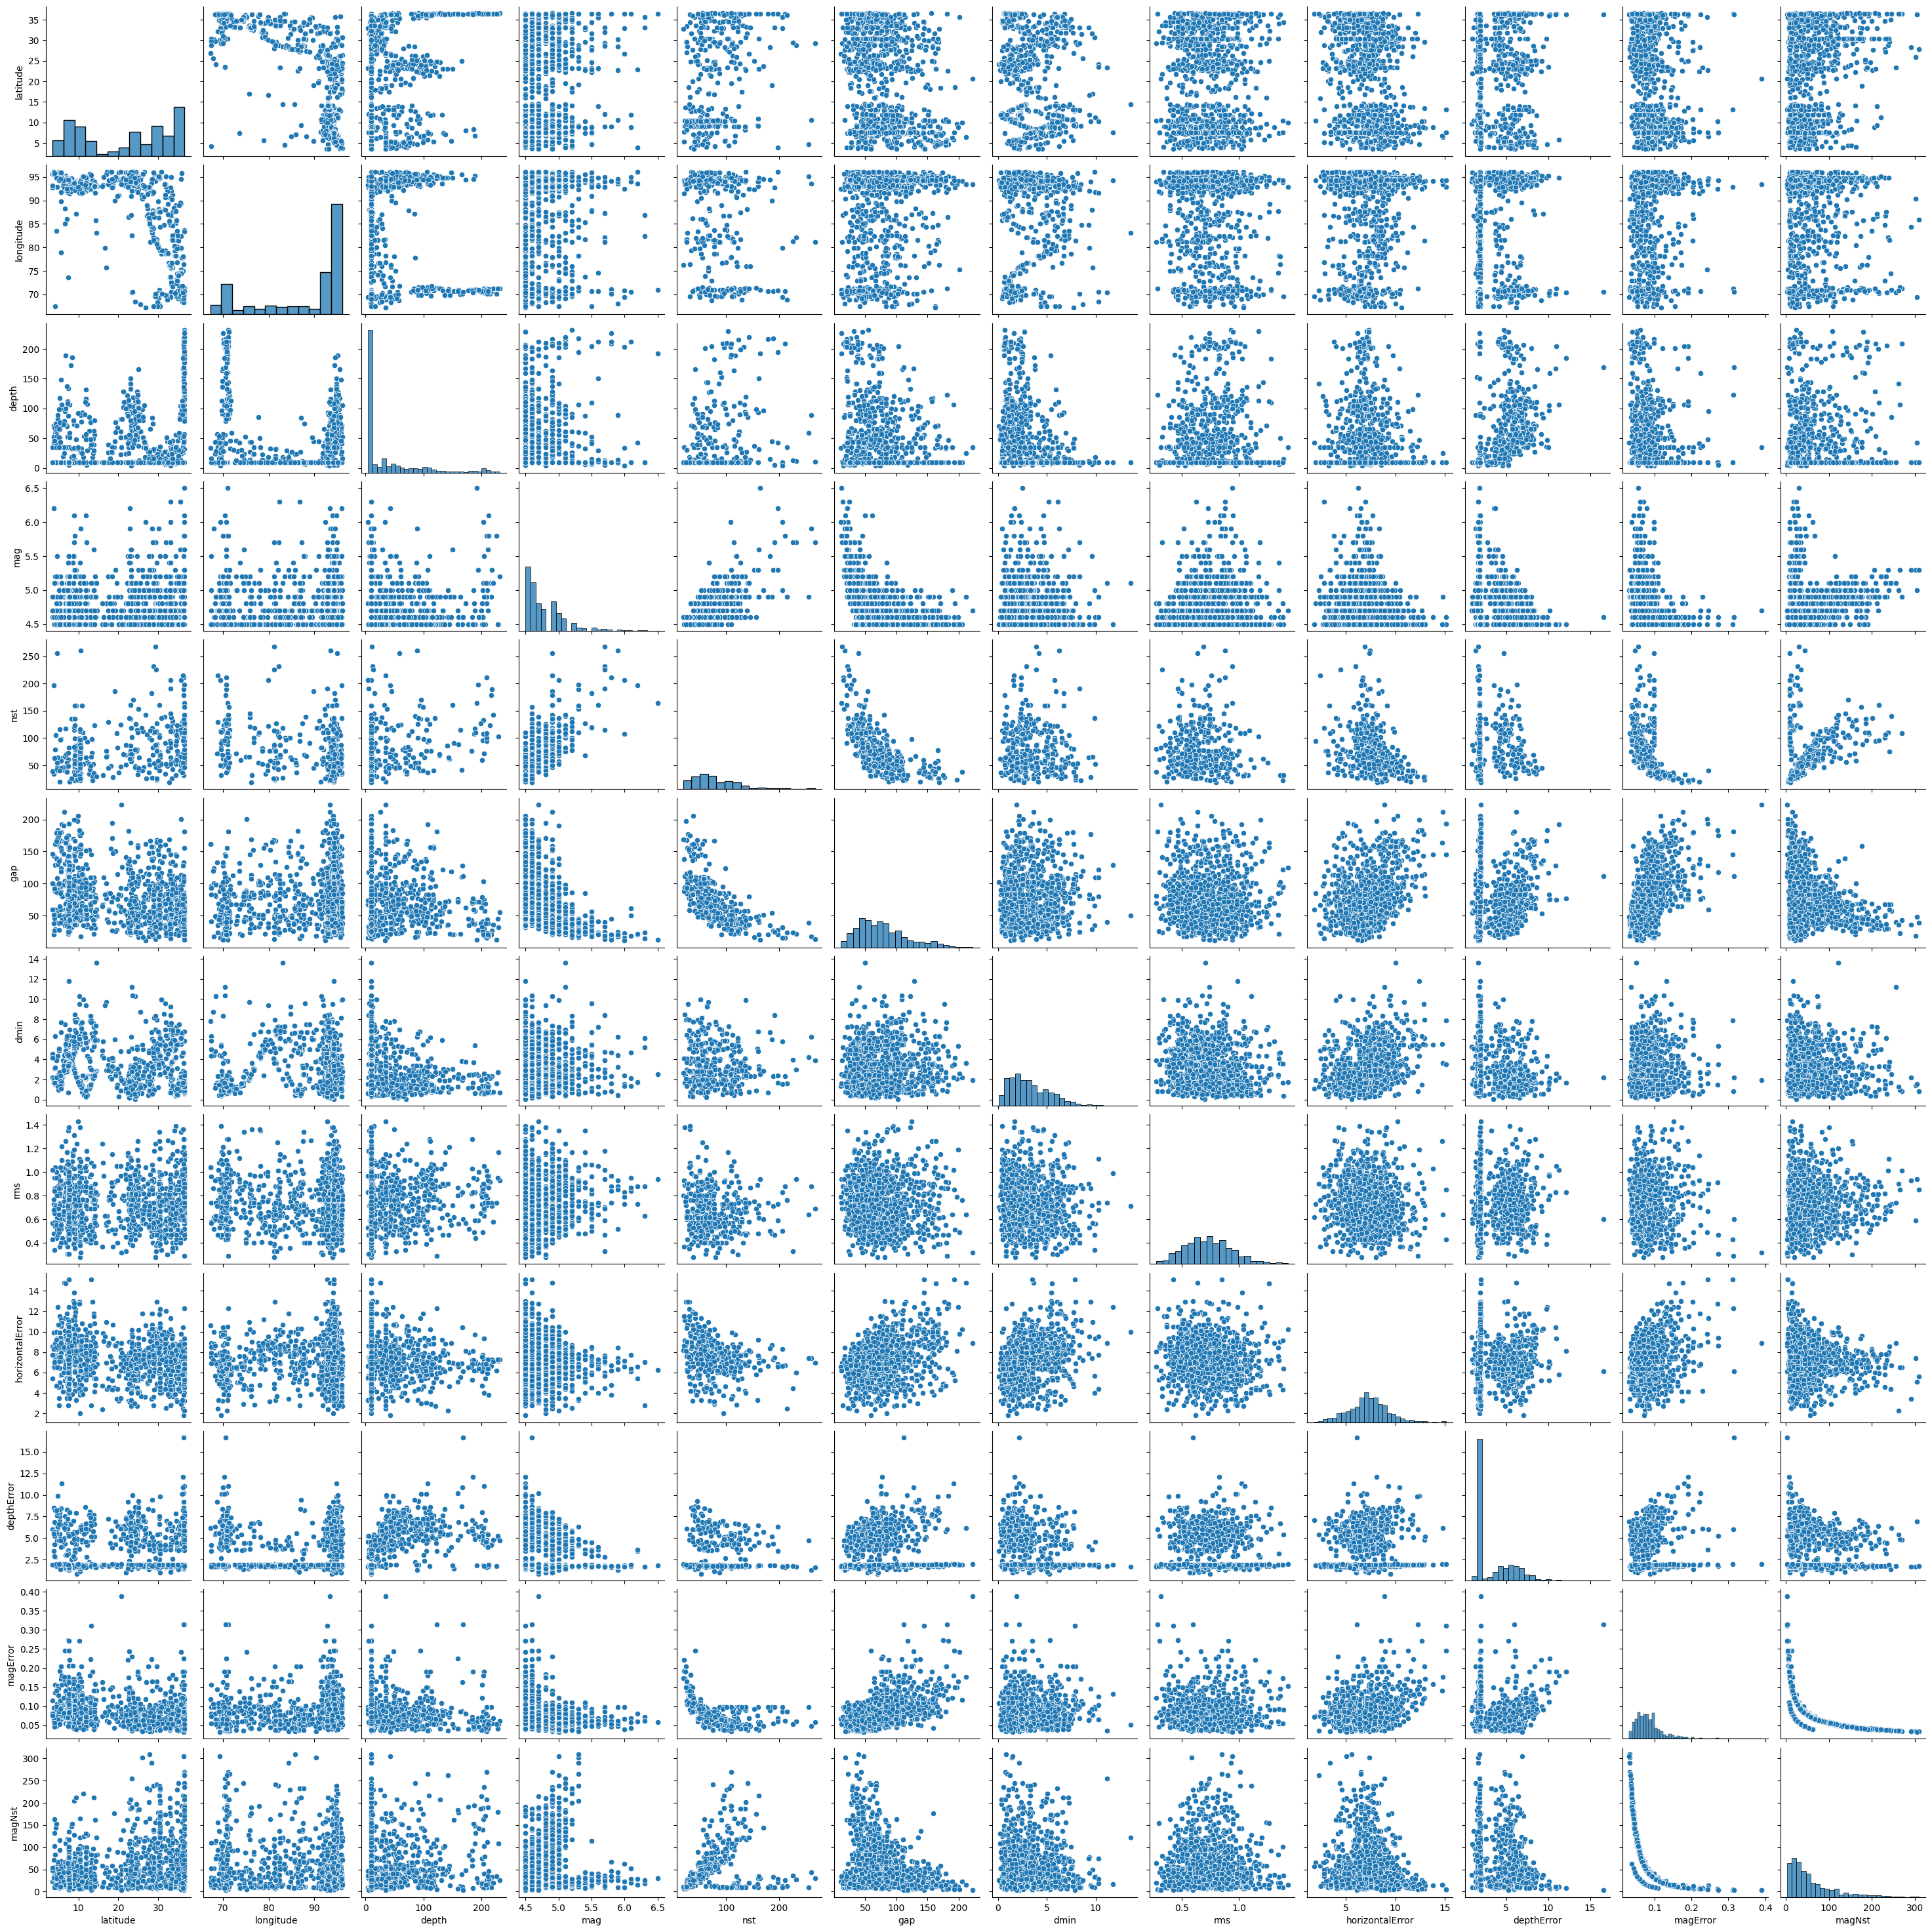

In [104]:
sns.pairplot(df)

<Axes: xlabel='magError', ylabel='mag'>

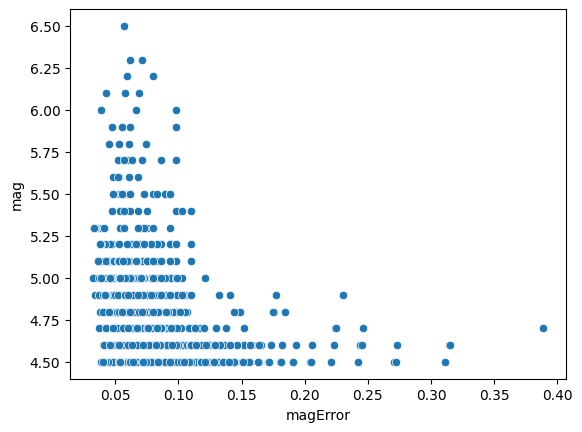

In [111]:
sns.scatterplot(df2, x='magError', y='mag')

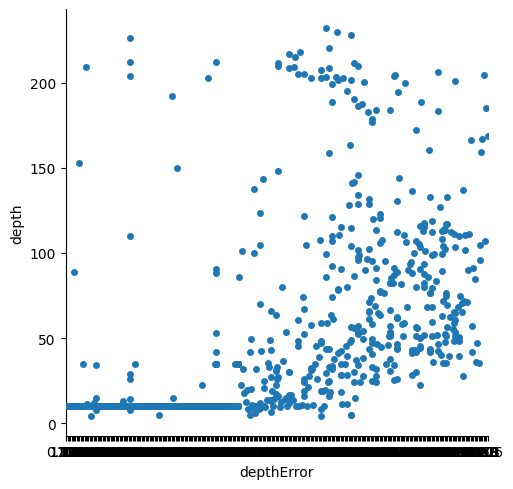

In [115]:
sns.catplot(df2, x='depthError', y='depth', kind='strip')

<Axes: xlabel='depthError', ylabel='depth'>

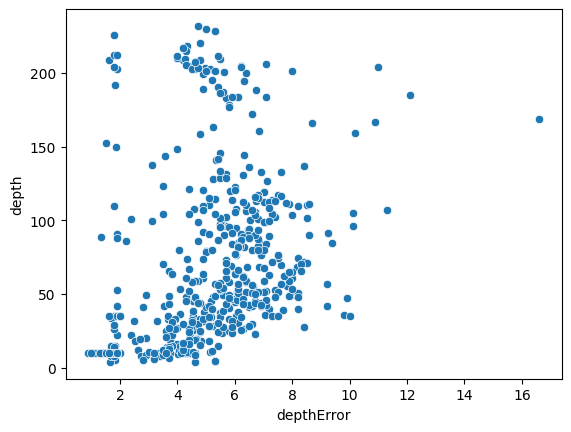

In [116]:
sns.scatterplot(df2, x='depthError', y='depth')

In [120]:
df2.describe()

,latitude,longitude,depth,mag,gap,dmin,rms,horizontalError,depthError,magError,magType_mb,magType_mwr,magType_mww
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,21.840075,87.655228,39.709792,4.779644,77.097561,3.265700,0.738490,7.279456,3.409370,0.086590,0.836773,0.002814,0.160413
std,11.337927,9.378554,50.931369,0.310578,39.269263,2.066058,0.205975,1.974504,2.209923,0.040002,0.369746,0.053000,0.367161
min,3.484800,67.191800,4.000000,4.500000,11.000000,0.075000,0.280000,1.800000,0.892000,0.032000,0.000000,0.000000,0.000000
25%,9.995425,81.198875,10.000000,4.500000,48.000000,1.667250,0.590000,6.100000,1.800000,0.060000,1.000000,0.000000,0.000000
50%,23.977300,93.343950,10.000000,4.700000,70.000000,2.852500,0.730000,7.300000,1.900000,0.079500,1.000000,0.000000,0.000000
75%,32.920825,94.370975,50.922500,4.900000,98.000000,4.615500,0.880000,8.475000,5.100000,0.099000,1.000000,0.000000,0.000000
max,36.591100,96.142100,231.910000,6.500000,223.000000,13.581000,1.430000,15.100000,16.600000,0.389000,1.000000,1.000000,1.000000


C:\Users\Rishi\AppData\Local\Temp\ipykernel_14600\2514785769.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(df, x='time', y='mag', kind='line', size='magType', palette=palette)


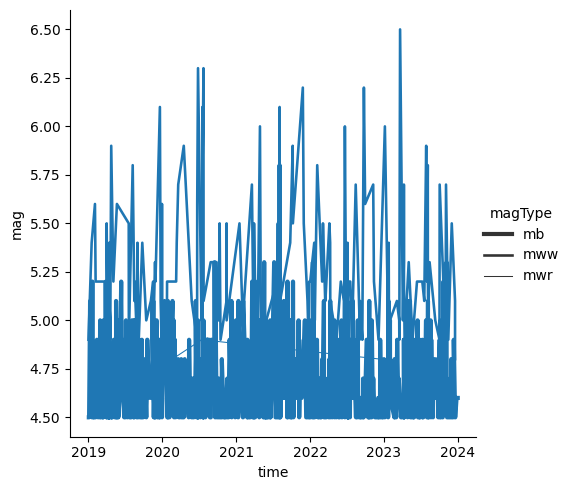

In [124]:
# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")
sns.relplot(df, x='time', y='mag', kind='line', size='magType', palette=palette)

##  Feature Selection

In [131]:
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

In [135]:
feat_sel = SelectKBest(f_classif, k=7)
feat_sel.fit_transform(X_train, y_train)

array([[2.2322e+01, 9.9000e+01, 9.9700e+00, ..., 6.4000e-02, 1.0000e+00,
        0.0000e+00],
       [3.4705e+01, 7.9000e+01, 5.8800e+00, ..., 5.9000e-02, 1.0000e+00,
        0.0000e+00],
       [1.0000e+01, 1.5400e+02, 7.4700e+00, ..., 1.0000e-01, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.1110e+02, 9.4000e+01, 1.0200e+01, ..., 9.3000e-02, 1.0000e+00,
        0.0000e+00],
       [1.8499e+02, 7.7000e+01, 8.1000e+00, ..., 1.9100e-01, 1.0000e+00,
        0.0000e+00],
       [4.3760e+01, 3.9000e+01, 7.5000e+00, ..., 9.3000e-02, 0.0000e+00,
        1.0000e+00]])

In [136]:
X_train_new = X_train.columns[feat_sel.get_support(indices=True)]
X_train_new

Index(['depth', 'gap', 'horizontalError', 'depthError', 'magError',
       'magType_mb', 'magType_mww'],
      dtype='object')

In [132]:
feat_thresh = VarianceThreshold()
feat_thresh.fit(X_train, y_train)

VarianceThreshold()

In [133]:
varrs = feat_thresh.variances_

feat_names = X_train.columns.tolist()

# Sort together by variance (descending order)
sorted_together = sorted(zip(varrs, feat_names), key=lambda x: x[0], reverse=True)
varrs, feat_names = zip(*sorted_together)


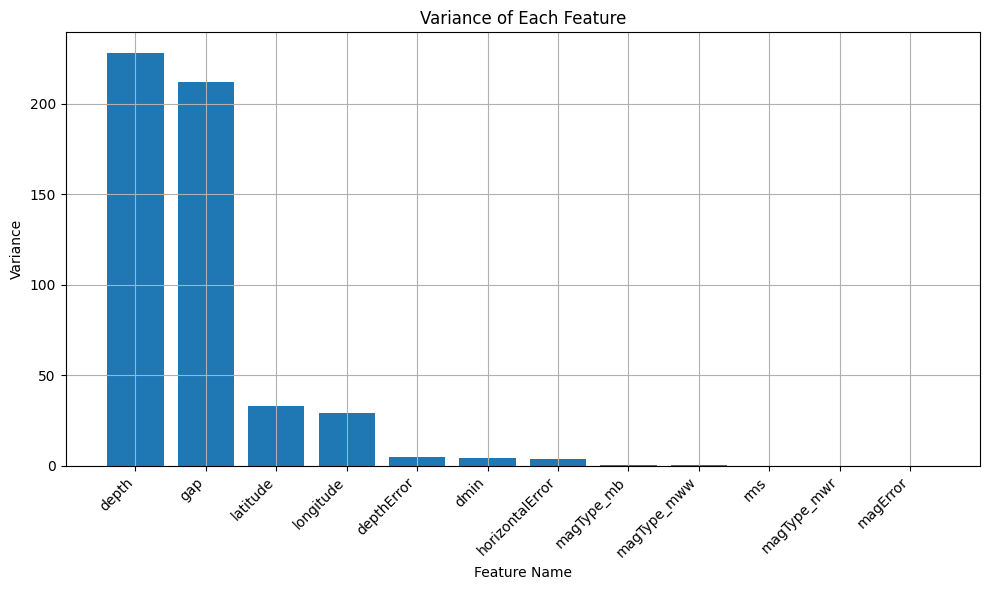

In [134]:
# Create a bar plot to visualize variance
plt.figure(figsize=(10, 6))
plt.bar(feat_names, varrs)
plt.xlabel('Feature Name')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [161]:
test_X.shape

(352, 12)

# Modeling

In [249]:

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

In [145]:
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size=0.33, random_state=2)

In [189]:
# Defining a pipeline for testing

def mod_pipL(X, y, scale, mod):
    pipL = Pipeline([
        ('scaler', scale),
        ('model', mod)]).fit(X, y)
    return pipL

def pred_pipL(pipeL, test):
    return pipeL.predict(test)

def metr_ics(true, pred):
    MAE = mean_absolute_error(true, pred) * 100
    R2 = r2_score(true, pred) * 100
    RMSE = root_mean_squared_error(true, pred) * 100
    return MAE, R2, RMSE

In [221]:
# Standard Scaler
GBR = mod_pipL(train_X, train_y, StandardScaler(), GradientBoostingRegressor())
SV = mod_pipL(train_X, train_y, StandardScaler(), SVR(kernel='rbf'))
LR = mod_pipL(train_X, train_y, StandardScaler(), LinearRegression())
RF = mod_pipL(train_X, train_y, StandardScaler(), RandomForestRegressor())


In [222]:
pr =  pred_pipL(GBR, test_X)

print("With Standard Scaler", "\nGBR:", metr_ics(test_y, pred_pipL(GBR, test_X)),"\nSVR:", metr_ics(test_y, pred_pipL(SV, test_X)), "\nLR:", metr_ics(test_y, pred_pipL(LR, test_X)), "\nRF:", metr_ics(test_y, pred_pipL(RF, test_X)))


With Standard Scaler 
GBR: (11.867324754793957, 72.74009375693154, 16.255848431102418) 
SVR: (12.765376299478579, 65.58128028756876, 18.266057406201472) 
LR: (15.119166897507174, 56.40772418482418, 20.55664489553388) 
RF: (11.797159090909117, 72.84588342548464, 16.22427509236478)


In [231]:
# MinMax Scaler
GBR_mm = mod_pipL(train_X, train_y, MinMaxScaler(), GradientBoostingRegressor())
SV_mm = mod_pipL(train_X, train_y, MinMaxScaler(), SVR(kernel='poly',degree=3))
LR_mm = mod_pipL(train_X, train_y, MinMaxScaler(), LinearRegression())
RF_mm = mod_pipL(train_X, train_y, MinMaxScaler(), RandomForestRegressor())

In [232]:
pr1 =  pred_pipL(GBR, test_X)

print("With Standard Scaler", "\nGBR:", metr_ics(test_y, pred_pipL(GBR_mm, test_X)), "\nSVR:", metr_ics(test_y, pred_pipL(SV_mm, test_X)), "\nLR:", metr_ics(test_y, pred_pipL(LR_mm, test_X)), "\nRF:", metr_ics(test_y, pred_pipL(RF_mm, test_X)))

With Standard Scaler 
GBR: (11.79982442746116, 72.88802987424123, 16.211679191551042) 
SVR: (13.393697702820088, 63.823595055195405, 18.726653101566043) 
LR: (15.120359268567219, 56.43030228488598, 20.551320671345945) 
RF: (11.906818181818215, 72.10272597770538, 16.44479055396078)


In [240]:
cross_val_score(RF, train_X, train_y, cv=5)

array([0.55691718, 0.70429599, 0.75975346, 0.76019349, 0.73558439])

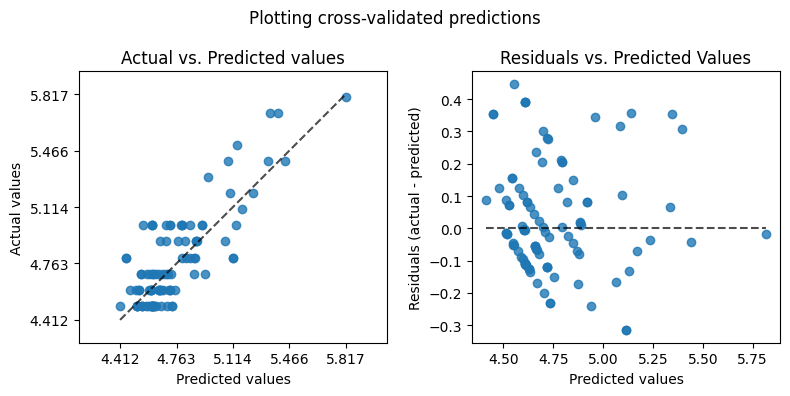

In [247]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    test_y,
    y_pred=pred_pipL(SV_mm, test_X),
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    test_y,
    y_pred=pred_pipL(SV_mm, test_X),
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## Cross-Validation

In [252]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(train_X)



5

In [257]:
# Initialize an empty list to store the scores from each fold
scores = []

for train_index, test_index in kf.split(df2):
    X, X_t = train_X[train_index], test_X[test_index]
    y, y_t = train_y[train_index], test_y[test_index]
    
    GradientBoostingRegressor().fit(X, y)

    #  Make predictions on the testing set
    pred = model.predict(X_t)

    # Evaluate the model performance (e.g., mean squared error for regression)
    score = mean_squared_error(y_t, pred)
    scores.append(score)

score

KeyError: "None of [Index([   0,    3,    4,    6,    7,    9,   10,   11,   12,   13,\n       ...\n       1051, 1052, 1053, 1054, 1055, 1056, 1057, 1061, 1062, 1065],\n      dtype='int32', length=852)] are in the [columns]"